In [1]:
import pandas as pd
df = pd.read_csv('../input/data.csv')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [2]:
df.head() 

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [3]:
df.describe() #descriptive statistics

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


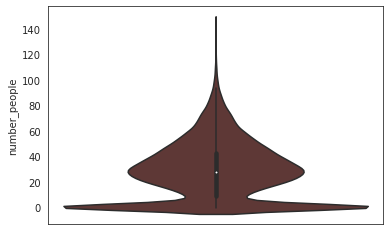

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set_palette('Reds_d')
%matplotlib inline
sns.violinplot(y=df["number_people"])

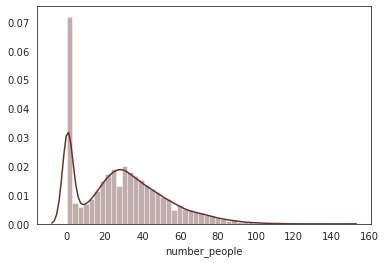

In [5]:
sns.distplot(df["number_people"])

## That sure has a lot of zeroes! Let's see how different variables affect the number of people.

## Ordinal variables first.

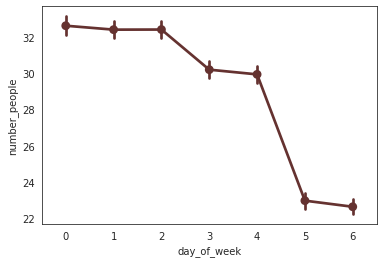

In [6]:
sns.pointplot(x="day_of_week", y="number_people",data=df)

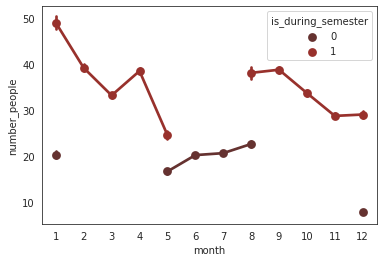

In [7]:
sns.pointplot(x="month", y="number_people",hue='is_during_semester',data=df)

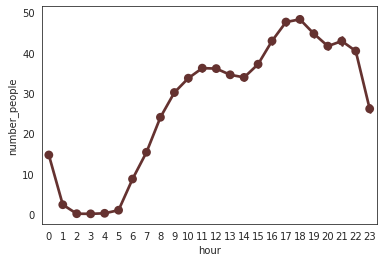

In [8]:
sns.pointplot(x="hour", y="number_people",data=df)

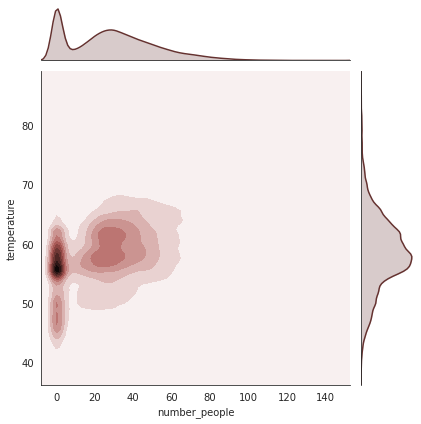

In [9]:
sns.jointplot(x="number_people", y="temperature", kind="kde",data=df)

This would be very interesting to see in a town with more temperature fluctuation.

## As expected, there are quite a few fluctations based on day, month and hour. The weekend, summer, and early morning seem to be the less crowded times.

## Now let's look at the binary variables.

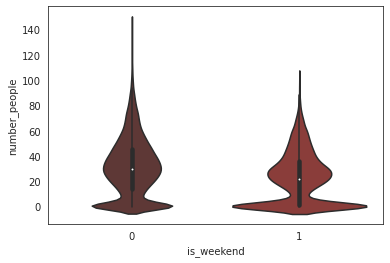

In [10]:
sns.violinplot(x="is_weekend", y="number_people", data=df)

In [11]:
df.groupby(by='is_weekend').mean()

,number_people,timestamp,day_of_week,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
is_weekend,,,,,,,,,
0,31.551397,45807.174777,1.990088,0.003588,58.475097,0.081648,0.670965,7.421514,12.238642
1,22.788175,45779.823650,5.498465,0.000000,58.765021,0.071688,0.632973,7.486242,12.230927


In [12]:
from scipy import stats
stats.ttest_ind(df['number_people'],df['is_weekend'], equal_var = False)

Ttest_indResult(statistic=316.35496545128643, pvalue=0.0)

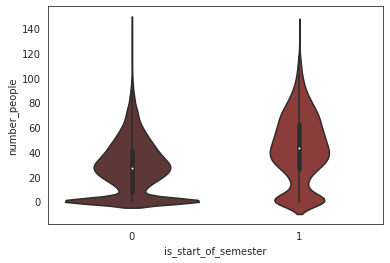

In [13]:
sns.violinplot(x="is_start_of_semester", y="number_people", data=df)

In [14]:
stats.ttest_ind(df['number_people'],df['is_start_of_semester'], equal_var = False)

Ttest_indResult(statistic=318.63734607270743, pvalue=0.0)

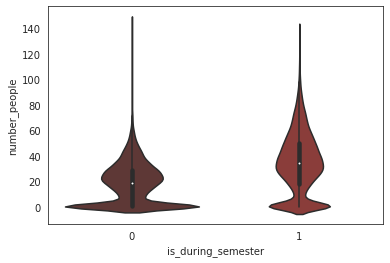

In [15]:
sns.violinplot(x="is_during_semester", y="number_people", data=df)

In [16]:
stats.ttest_ind(df['number_people'],df['is_during_semester'], equal_var = False)

Ttest_indResult(statistic=312.20197346062054, pvalue=0.0)

## According to the plots and t-tests of the binary variables above, data suggest the gym is more crowded during the semester, at the start of the semester, and during the week (versus weekend). 

In [17]:
RF = df[["is_during_semester",'is_start_of_semester','is_weekend','hour',
         'day_of_week','is_holiday','temperature','month','number_people']]
features = RF.columns[:8]
features

Index(['is_during_semester', 'is_start_of_semester', 'is_weekend', 'hour',
       'day_of_week', 'is_holiday', 'temperature', 'month'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


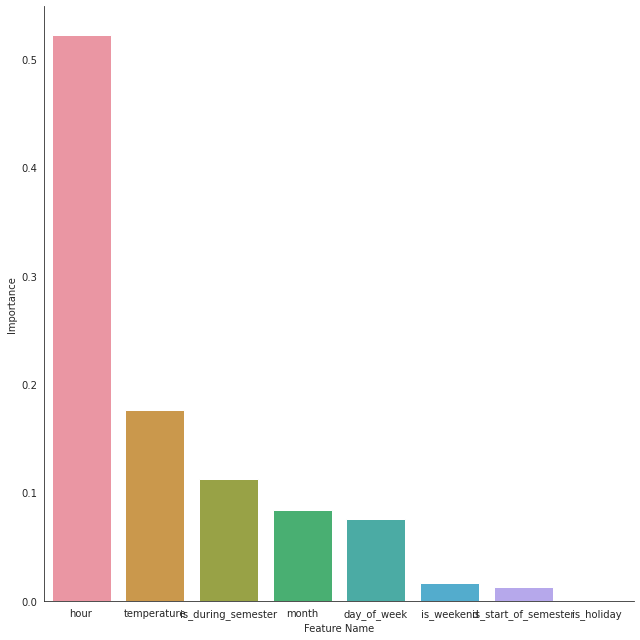

In [18]:
from sklearn.ensemble import RandomForestRegressor
sns.set_style("white")
colors = ['silver',"black", 'charcoal']
sns.set_palette(sns.xkcd_palette(colors))
y = RF['number_people']
rgr1 = RandomForestRegressor(n_jobs=5)
rgr1.fit(RF[features], y)

features_out = pd.DataFrame({'Feature Name':features,'Importance': rgr1.feature_importances_})
features_out.sort_values(by='Importance',inplace=True,ascending=False)

sns.factorplot(x="Feature Name", y="Importance",data=features_out, kind='bar',size=9)

In [19]:
rgr1.score(RF[features], y)

0.9523408836264771

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


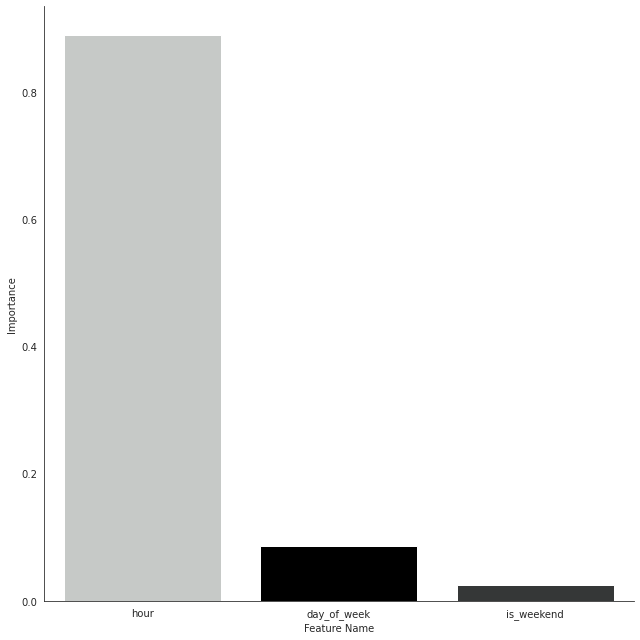

In [20]:
start = df[df['is_start_of_semester'].isin([1])]
RF_start = start[['is_weekend','hour','day_of_week','number_people']]
features = RF_start.columns[:3]
y = RF_start['number_people']
rgr2 = RandomForestRegressor(n_jobs=2)
rgr2.fit(RF_start[features], y)

features_out2 = pd.DataFrame({'Feature Name':features,'Importance': rgr2.feature_importances_})
features_out2.sort_values(by='Importance',inplace=True,ascending=False)

sns.factorplot(x="Feature Name", y="Importance",data=features_out2, kind='bar',size=9)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


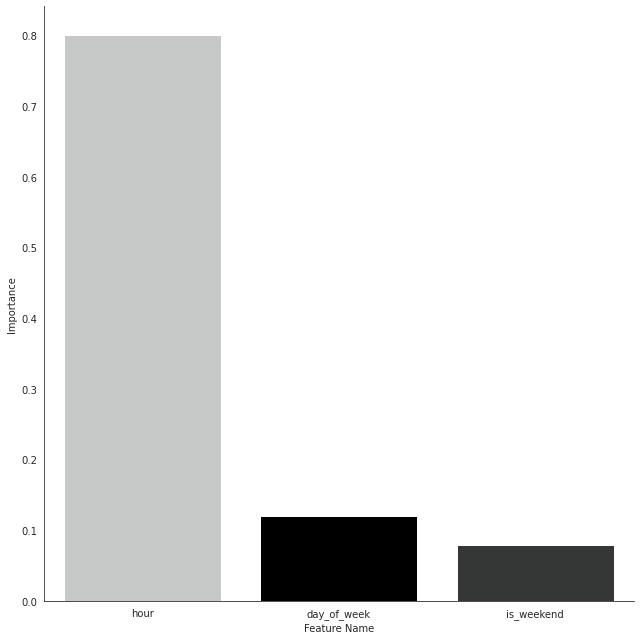

In [21]:
start_and_morn = start[start['hour'].isin([6,7,8,9,10,11])]
RF_start_and_morn = start_and_morn[['is_weekend','hour','day_of_week','number_people']]
features = RF_start_and_morn.columns[:3]
y = RF_start_and_morn['number_people']
rgr3 = RandomForestRegressor(n_jobs=5)
rgr3.fit(RF_start_and_morn[features], y)

features_out3 = pd.DataFrame({'Feature Name':features,'Importance': rgr3.feature_importances_})
features_out3.sort_values(by='Importance',inplace=True,ascending=False)

sns.factorplot(x="Feature Name", y="Importance",data=features_out3, kind='bar',size=9)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


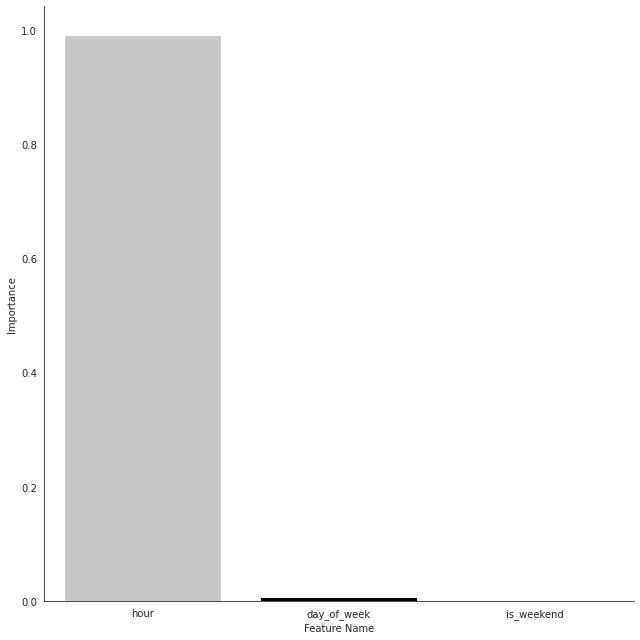

In [22]:
start_and_aft = start[start['hour'].isin([12,1,2,3,4])]
RF_start_and_aft = start_and_aft[['is_weekend','hour','day_of_week','number_people']]
features = RF_start_and_aft.columns[:3]
y = RF_start_and_aft['number_people']
rgr4 = RandomForestRegressor(n_jobs=5)
rgr4.fit(RF_start_and_aft[features], y)

features_out4 = pd.DataFrame({'Feature Name':features,'Importance': rgr4.feature_importances_})
features_out4.sort_values(by='Importance',inplace=True,ascending=False)

sns.factorplot(x="Feature Name", y="Importance",data=features_out4, kind='bar',size=9)